In [48]:
import pandas as pd
import numpy as np

In [105]:
data = pd.read_csv('Files/Day9.txt', header=None)
data.head()

,0
0,3566789567953212679875689976651013679329876404...
1,2675895456894334598764999865432124567919995323...
2,1234996345789445679989899976543534678998999464...
3,0125679234579659789998789988754755889767898965...
4,2336798945689867894987679798768887998654967899...


In [115]:
data_matrix = pd.DataFrame(columns=range(len(data.iloc[0,0])), index=range(data.shape[0]))
data_matrix = data_matrix.fillna('.')

for i in range(data.shape[0]):
    for j in range(len(data.iloc[0,0])):
        data_matrix.iloc[i,j] = list(data.iloc[i,0])[j]

data_matrix

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,3,5,6,6,7,8,9,5,6,7,...,3,5,5,7,8,9,9,7,6,7
1,2,6,7,5,8,9,5,4,5,6,...,2,3,4,6,7,8,9,6,5,6
2,1,2,3,4,9,9,6,3,4,5,...,1,2,3,7,8,9,1,2,3,5
3,0,1,2,5,6,7,9,2,3,4,...,2,3,4,6,9,3,2,9,9,6
4,2,3,3,6,7,9,8,9,4,5,...,3,4,5,7,8,9,9,8,8,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,6,7,9,8,6,4,5,9,8,9,...,9,9,8,8,6,7,8,9,4,5
96,7,8,9,4,5,3,4,5,6,8,...,7,8,9,9,9,8,9,2,3,4
97,8,9,8,3,2,1,3,3,4,5,...,6,9,7,6,5,9,0,1,2,3
98,9,8,7,6,5,0,1,2,3,5,...,9,8,7,6,3,2,1,2,3,4


In [83]:
# Part 1, Sum of the Lowest Values
# We need to create special methods for the first and last row
lowest_sum = 0

for idx in range(len(data)):
    row = data.iloc[idx][0]
    
    row_before = data.iloc[idx-1][0] if idx - 1 >= 0 else None
    row_after = data.iloc[idx+1][0] if idx + 1 < len(data) else None
        
    for i in range(len(row)):
        number = int(row[i])
        
        left_number = int(row[i-1]) if i-1 >= 0 else None
        right_number = int(row[i+1]) if i+1 < len(row) else None
        upper_number = int(row_before[i]) if row_before is not None else None
        lower_number = int(row_after[i]) if row_after is not None else None
        
        numbers = [left_number, right_number, upper_number, lower_number]
        
        minimum_number = np.min([n for n in numbers if n is not None])
        
        if number < minimum_number:
            lowest_sum += number + 1

lowest_sum

566

Guesses:
    324

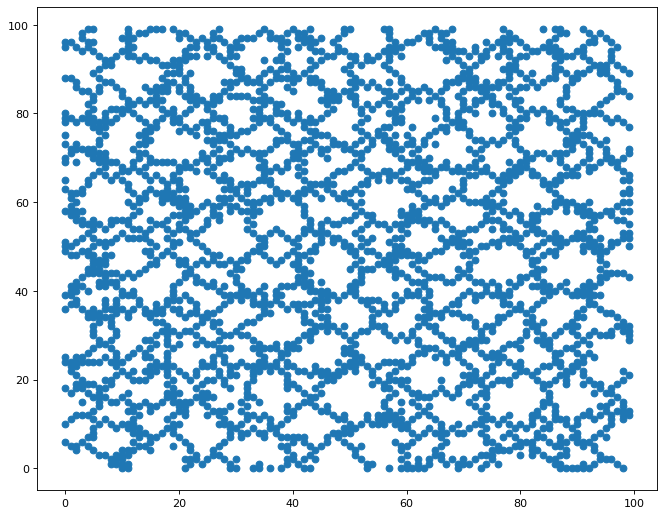

In [93]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

nines = []
for idx in range(len(data)):
    row = data.iloc[idx][0]
    for i in range(len(row)):
        number = int(row[i])
        if number == 9:
            nines.append((idx, i))

figure(figsize=(10, 8), dpi=80)
plt.scatter(*zip(*nines))
plt.show()

In [84]:
# Part Two
# Find the area of all the basins
# I think we need to use the above script to make a list of tuples (coordinates) for the bottoms.
# Then iterate outwards until we have all nines.
# Create a list of the areas.

coordinates = []

for idx in range(len(data)):
    row = data.iloc[idx][0]
    
    row_before = data.iloc[idx-1][0] if idx - 1 >= 0 else None
    row_after = data.iloc[idx+1][0] if idx + 1 < len(data) else None
        
    for i in range(len(row)):
        number = int(row[i])
        
        left_number = int(row[i-1]) if i-1 >= 0 else None
        right_number = int(row[i+1]) if i+1 < len(row) else None
        upper_number = int(row_before[i]) if row_before is not None else None
        lower_number = int(row_after[i]) if row_after is not None else None
        
        numbers = [left_number, right_number, upper_number, lower_number]
        
        minimum_number = np.min([n for n in numbers if n is not None])
        
        if number < minimum_number:
            coordinates.append((idx, i))

In [86]:
coordinates[0]

(0, 14)

In [88]:
for row, col in coordinates:
    print(f'row {row} col {col}')

row 0 col 14
row 0 col 31
row 0 col 44
row 0 col 54
row 0 col 60
row 0 col 72
row 0 col 81
row 1 col 21
row 1 col 38
row 2 col 89
row 2 col 96
row 3 col 0
row 3 col 7
row 3 col 50
row 3 col 74
row 4 col 66
row 5 col 18
row 5 col 39
row 6 col 22
row 6 col 30
row 7 col 13
row 7 col 35
row 7 col 60
row 7 col 86
row 7 col 97
row 8 col 6
row 8 col 26
row 8 col 43
row 8 col 67
row 8 col 79
row 9 col 74
row 10 col 48
row 10 col 54
row 11 col 37
row 12 col 30
row 12 col 63
row 13 col 6
row 13 col 23
row 13 col 69
row 13 col 90
row 14 col 18
row 14 col 58
row 14 col 99
row 15 col 43
row 15 col 80
row 17 col 2
row 17 col 11
row 17 col 25
row 17 col 50
row 17 col 68
row 17 col 95
row 18 col 88
row 19 col 55
row 19 col 64
row 19 col 83
row 20 col 33
row 20 col 73
row 21 col 26
row 21 col 37
row 21 col 86
row 23 col 19
row 23 col 50
row 23 col 80
row 23 col 97
row 24 col 9
row 24 col 55
row 24 col 63
row 25 col 0
row 25 col 30
row 25 col 40
row 25 col 90
row 26 col 70
row 26 col 78
row 27 col 23
ro

In [165]:
class Location:
    def __init__(self, energy):
        self.energy = energy
        self.counted = False
        
def count_area(d, coordinate, area = 0):
    row = coordinate[0]
    column = coordinate[1]
    #print(f'Accessing {row} {column} with area {area}')
    
    if not d.iloc[row, column].counted:
        area += 1
        d.iloc[row, column].counted = True
        
    if row - 1 > 0:
        if not d.iloc[row-1, column].counted and d.iloc[row-1, column].energy < 9:
            area += count_area(d, (row-1, column), 0)
        
    if row + 1 < d.shape[0]:
        if not d.iloc[row+1, column].counted and d.iloc[row+1, column].energy < 9:
            area += count_area(d, (row+1, column), 0)
        
    if column - 1 > 0:
        if not d.iloc[row, column-1].counted and d.iloc[row, column-1].energy < 9:
            area += count_area(d, (row, column-1), 0)
        
    if column + 1 < d.shape[1]:
        if not d.iloc[row, column+1].counted and d.iloc[row, column+1].energy < 9:
            area += count_area(d, (row, column+1), 0)
    
    return area
        
sea_floor = pd.DataFrame(columns=range(data_matrix.shape[1]), index=range(data_matrix.shape[0]))
sea_floor = sea_floor.fillna('.')

for i in range(sea_floor.shape[0]):
    for j in range(sea_floor.shape[1]):
        sea_floor.iloc[i,j] = Location(energy = int(data_matrix.iloc[i,j]))
        
#test_sum = count_area(sea_floor, coordinate = (0,14))
#print(test_sum)

areas = []
for coord in coordinates:
    areas.append(count_area(sea_floor, coord))

In [166]:
areas.sort(reverse=True)

In [167]:
ans = 1
for a in areas[0:3]:
    ans *= a
ans

891684